In [1]:
import wbgapi as wb                          # To access World Bank Data API
import pandas as pd

def load_data(filename):
    datafromcsv = pd.read_csv(filename)
    
    dfyear = datafromcsv.columns.to_frame().T.append(datafromcsv, ignore_index=True)
    dfyear.columns = range(len(dfyear.columns))
    
    return datafromcsv["Country Code"], dfyear.iloc[0, 4:]
    
dfcountry, dfyear = load_data("API_19_DS2_en_csv_v2_3931355.csv")

print(dfcountry)
print(dfyear)

# randomly selected 10 countries from the list of developing countries 2022
country_codes = ['IND', 'KHM', 'AZE', 'BLR', 'DJI', 'ETF', 'FJI', 'GHA', 'HTI', 'KEN']

0        ABW
1        ABW
2        ABW
3        ABW
4        ABW
        ... 
20211    ZWE
20212    ZWE
20213    ZWE
20214    ZWE
20215    ZWE
Name: Country Code, Length: 20216, dtype: object
4     1960
5     1961
6     1962
7     1963
8     1964
      ... 
60    2016
61    2017
62    2018
63    2019
64    2020
Name: 0, Length: 61, dtype: object


<AxesSubplot:>

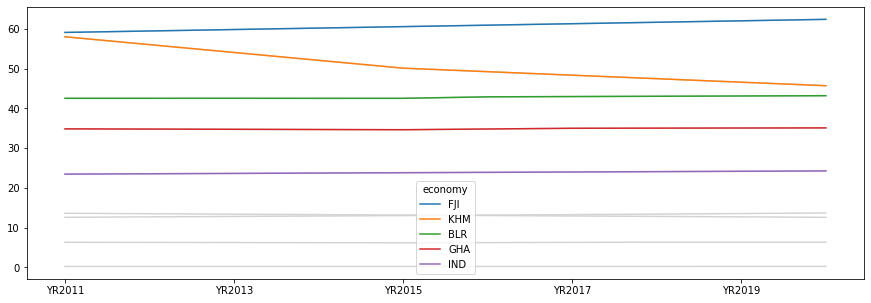

In [2]:
# will find the year wise data of forest year in terms of % of land area over a period of 5 years for these selected countries
# AG.LND.FRST.ZS => Forest area (% of land area)
df_forest_area = wb.data.DataFrame('AG.LND.FRST.ZS', country_codes, mrv=10)
g5 = df_forest_area.sort_values(by=['YR2020'],ascending=False)[:5]
ax = df_forest_area.T.plot(color='lightgray', legend=False)
g5.T.plot(ax=ax, figsize=(15,5))

In [3]:
df_forest_area

,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
economy,,,,,,,,,,
AZE,12.600996,12.710827,12.820504,12.929709,13.039534,13.154412,13.273146,13.413930,13.553367,13.692864
BLR,42.534621,42.538071,42.541940,42.531765,42.534166,42.906970,42.977979,43.051532,43.122968,43.194403
DJI,0.241588,0.241588,0.241588,0.241588,0.241588,0.241588,0.242019,0.243313,0.245902,0.250216
FJI,59.108703,59.474111,59.839518,60.204926,60.570334,60.935961,61.301587,61.667214,62.032841,62.398467
GHA,34.852914,34.797987,34.743061,34.688134,34.633207,34.816911,35.000615,35.032346,35.064077,35.095851
HTI,13.616618,13.503919,13.391219,13.278520,13.165820,13.052975,12.940131,12.827286,12.714441,12.601597
IND,23.463822,23.553422,23.643023,23.732624,23.822225,23.911825,24.001426,24.091027,24.180628,24.270228
KEN,6.321035,6.288028,6.255020,6.222012,6.189004,6.240942,6.292880,6.344818,6.344818,6.344818
KHM,58.014661,56.040483,54.066304,52.092126,50.117947,49.235951,48.353954,47.471958,46.589961,45.707965


<AxesSubplot:>

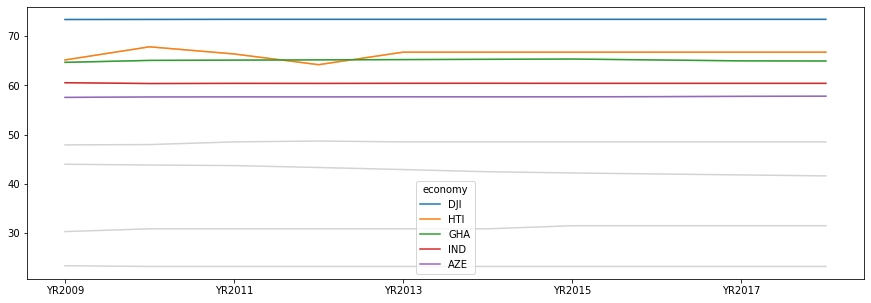

In [4]:
# will find the year wise data of agriculture year in terms of % of land area over a period of 5 years for these selected countries
# AG.LND.AGRI.ZS => Agriculture area (% of land area)
df_agri_area = wb.data.DataFrame('AG.LND.AGRI.ZS', country_codes, mrv=10)
g5 = df_agri_area.sort_values(by=['YR2018'],ascending=False)[:5]
ax = df_agri_area.T.plot(color='lightgray', legend=False)
g5.T.plot(ax=ax, figsize=(15,5))

In [5]:
df_agri_area

,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018
economy,,,,,,,,,,
AZE,57.579095,57.670345,57.691935,57.687096,57.704545,57.700543,57.701753,57.735575,57.795601,57.825393
BLR,44.014397,43.854115,43.738603,43.349268,42.931772,42.487917,42.242016,42.035490,41.844426,41.644497
DJI,73.395168,73.408110,73.425367,73.425367,73.425367,73.425367,73.425367,73.425367,73.425367,73.425367
FJI,23.404488,23.262178,23.262178,23.262178,23.262178,23.262178,23.262178,23.262178,23.262178,23.262178
GHA,64.694129,65.092160,65.147086,65.202013,65.256939,65.311866,65.366793,65.183089,64.999385,64.967654
HTI,65.178882,67.851959,66.400581,64.223512,66.763425,66.763425,66.763425,66.763425,66.763425,66.763425
IND,60.563906,60.397418,60.430043,60.420626,60.439461,60.447196,60.431389,60.431389,60.431389,60.431389
KEN,47.940753,48.002249,48.546930,48.722634,48.546930,48.546930,48.546930,48.546930,48.546930,48.546930
KHM,30.336506,30.903014,30.903014,30.903014,30.903014,30.903014,31.531838,31.531838,31.531838,31.531838


<AxesSubplot:xlabel='economy'>

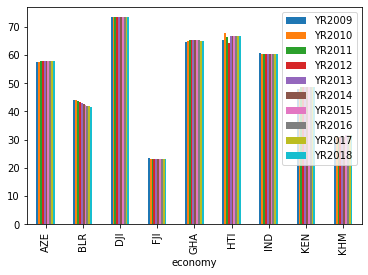

In [6]:
df_agri_area.plot.bar()

In [7]:
concate_data = wb.data.DataFrame(['AG.LND.FRST.ZS','AG.LND.AGRI.ZS'], country_codes, time=range(2012,2016))
concate_data

YR2012     YR2013     YR2014     YR2015
economy series                                                    
AZE     AG.LND.AGRI.ZS  57.687096  57.704545  57.700543  57.701753
        AG.LND.FRST.ZS  12.710827  12.820504  12.929709  13.039534
BLR     AG.LND.AGRI.ZS  43.349268  42.931772  42.487917  42.242016
        AG.LND.FRST.ZS  42.538071  42.541940  42.531765  42.534166
DJI     AG.LND.AGRI.ZS  73.425367  73.425367  73.425367  73.425367
        AG.LND.FRST.ZS   0.241588   0.241588   0.241588   0.241588
FJI     AG.LND.AGRI.ZS  23.262178  23.262178  23.262178  23.262178
        AG.LND.FRST.ZS  59.474111  59.839518  60.204926  60.570334
GHA     AG.LND.AGRI.ZS  65.202013  65.256939  65.311866  65.366793
        AG.LND.FRST.ZS  34.797987  34.743061  34.688134  34.633207
HTI     AG.LND.AGRI.ZS  64.223512  66.763425  66.763425  66.763425
        AG.LND.FRST.ZS  13.503919  13.391219  13.278520  13.165820
IND     AG.LND.AGRI.ZS  60.420626  60.439461  60.447196  60.431389
        AG.LND.FRST.ZS  23.553422  23.643023  23.732624  23.822225
KEN     AG.LND.AGRI.ZS  48.722634  48.546930  48.546930  48.546930
        AG.LND.FRST.ZS   6.288028   6.255020   6.222012   6.189004
KHM     AG.LND.AGRI.ZS  30.903014  30.903014  30.903014  31.531838
        AG.LND.FRST.ZS  56.040483  54.066304  52.092126  50.117947

<AxesSubplot:ylabel='economy'>

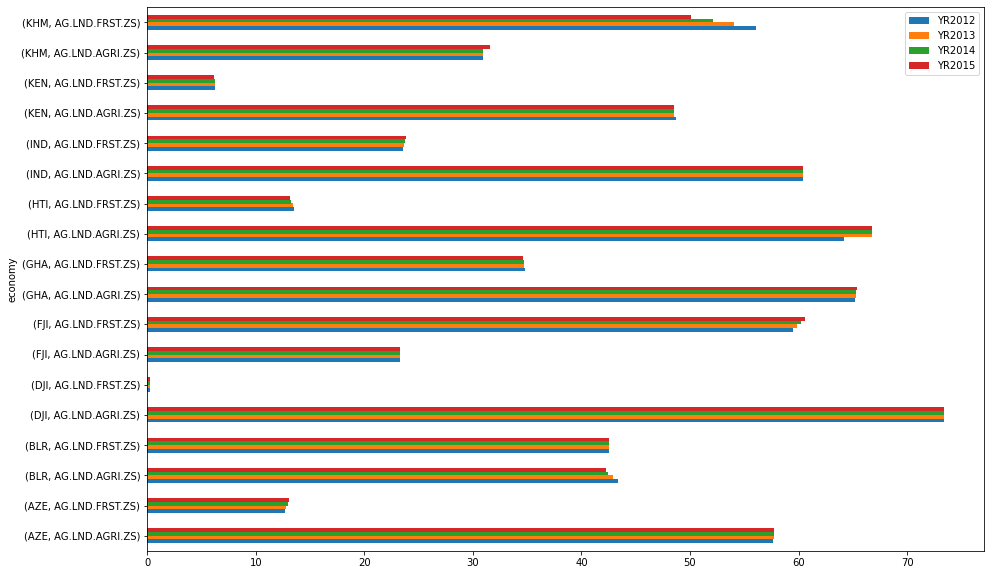

In [8]:
concate_data.plot.barh(xlabel='economy', ylabel='% of land area', figsize=(15, 10))